## 1. Importando módulos e funções
    Por: Rodolpho C. Braga (RCB)                  02 de Novembro de 2018.
         
    

In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
from rdkit.Chem import Descriptors
import sys
import multiprocessing
from standardiser import break_bonds, neutralise, rules, unsalt
from standardiser.utils import StandardiseException, sanity_check
%reload_ext autoreload
%autoreload 2
def warn(*args, **kwargs):
    pass  # to suppress sklearn warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn = warn
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import sys
sys.path.append("../../")
from rdkit_ipynb_tools import tools
from rdkit_ipynb_tools import  pipeline as p
from rdkit_ipynb_tools import  sar
from sklearn.metrics import cohen_kappa_score
import csv
from rdkit.Chem import MACCSkeys
from sklearn.model_selection import ShuffleSplit
import _pickle as cPickle
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit    
import bz2
from glob import glob
import _pickle as cPickle
import pickle
# The next two lines are for optical reasons only. They can be safely disabled.
Draw.DrawingOptions.atomLabelFontFace = "DejaVu Sans"
Draw.DrawingOptions.atomLabelFontSize = 18

#Modeling tools
exec(open('../../rdkit_ipynb_tools/modeling.py').read())

#Alerts Single rule pattern

#Alerts multicategory
# exec(open('../../rdkit_ipynb_tools/alerts.py').read())

#Alerts Cross Rules (complex)

  * could not import Bokeh, plotting with Highcharts instead.
- no local installation of highcharts found, using web version.
- loading highcharts...


* SA scorer not available. RDKit's Contrib dir needs to be in the Python import path...
rdkit_ipynb_tools.tools                       (171025-07:16)
- no local installation of JSME found, using web version.
* SA scorer not available. RDKit's Contrib dir needs to be in the Python import path...
> interactive IPython session.
rdkit_ipynb_tools.sar                         (180320-16:59)


Using TensorFlow backend.


## 2. Entrada dos dados

Escolher a formda da entrada dos dados:
1. SDF
1. CSV

### 2.1 SDF

In [2]:
#Caminho do SDF
file= "data/Skin_irritation_balanced_st.sdf"

sdfInfo = dict(smilesName='SMILES',molColName='ROMol')
moldf = PandasTools.LoadSDF(file,**sdfInfo)
print(moldf.shape)
#Rename ROMol
moldf = moldf.rename(columns={'ROMol': 'Mol'})
#duplicatas by smiles
moldf = moldf.drop_duplicates(subset=['SMILES'])
#logP
moldf['logP'] = moldf['Mol'].apply(MolLogP)
#Remove moléculas sem esrtutura no RDKit
moldf = moldf[pd.notnull(moldf['Mol'])]
print(moldf.shape)
#Colunas no pandas
moldf.keys()

(553, 18)
(553, 19)


Index(['ID', 'InChIKey', 'Molecular weight', 'Outcome', 'Mol', 'SMILES', 'StandardizerResult', 'casrn', 'edema/ erythema score', 'guideline', 'id_input', 'max_duration(hrs)', 'max_score', 'reversibility', 'species', 'substance_name', 'type_of_coverage', 'vehicle', 'logP'], dtype='object')

(553, 4)


ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
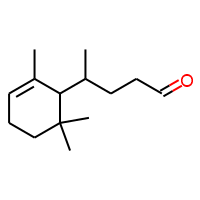
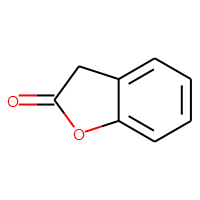
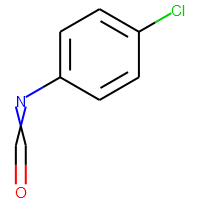
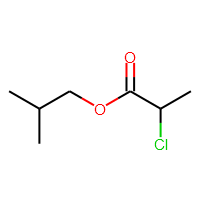
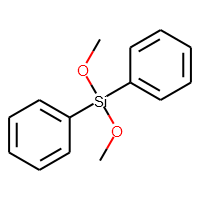

In [3]:
moldf = moldf[['ID','Mol', 'SMILES','Outcome']]
moldf = moldf[(moldf['Outcome']== '0')|(moldf['Outcome']== '1')]
print(moldf.shape)
moldf.head()

In [4]:
moldf.Outcome=pd.to_numeric(moldf.Outcome, errors='coerce')
moldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 0 to 553
Data columns (total 4 columns):
ID         553 non-null object
Mol        553 non-null object
SMILES     553 non-null object
Outcome    553 non-null int64
dtypes: int64(1), object(3)
memory usage: 21.6+ KB


### 2.2 CSV compactado para GZ

Os dados devem estar compactados para GZ (Reduz 90% do tamanho do arquivo).<br>
Você vai precisar:
1. Windows usar o 7-ZIP para compactar
1. Linux: gzip nomedoarquivo.csv
1. Em geral o encoding utf-8 funciona na maioria dos casos. Se nã uncionar usar o utf-16.

### 3. Definir a coluna a ser usada como variável dependente

In [ ]:
moldf = moldf.rename(columns={'Outcome': 'Outcome'})

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
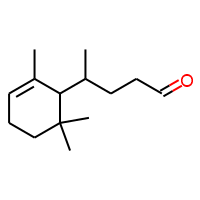

In [ ]:
moldf.head(1)

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
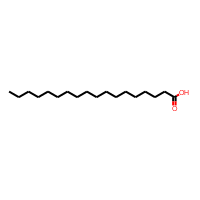
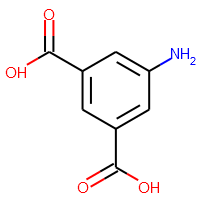
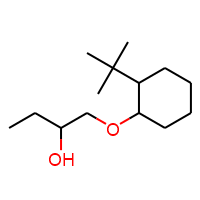
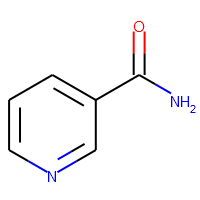
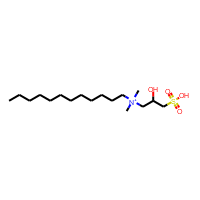
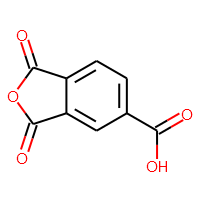
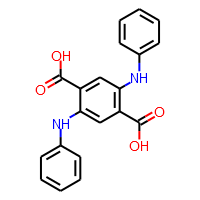
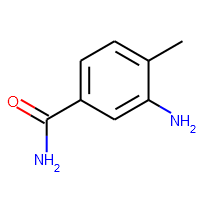
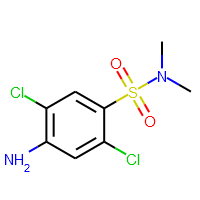
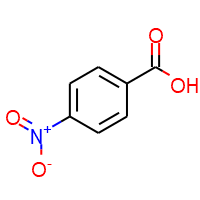
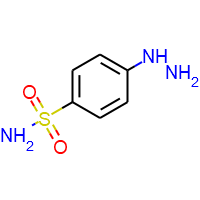
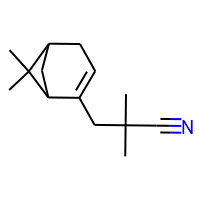
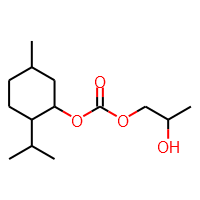
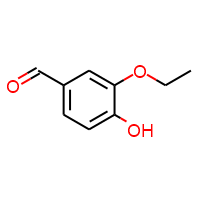
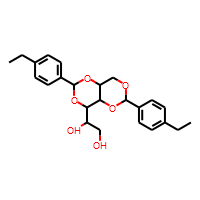
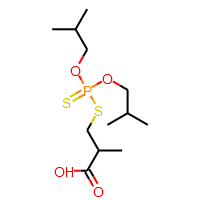
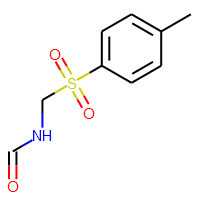
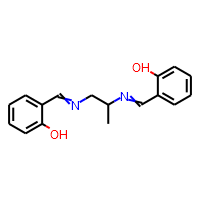
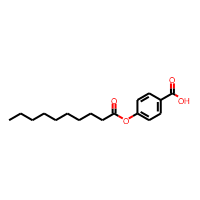
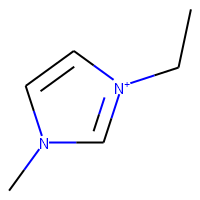
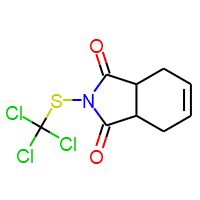
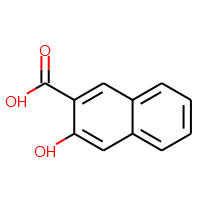
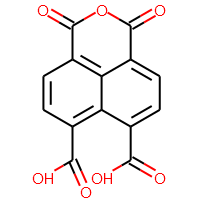
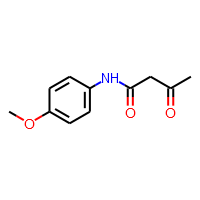
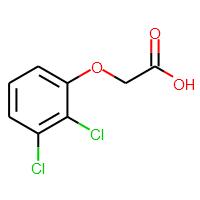
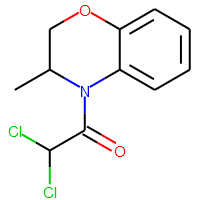
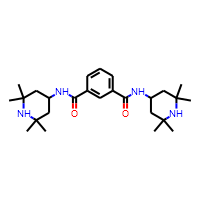
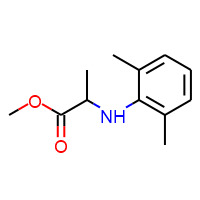
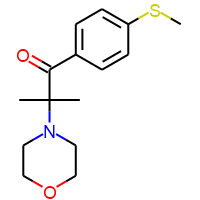
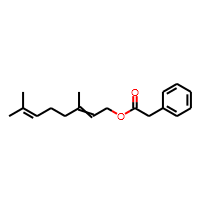
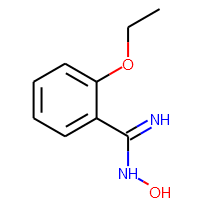
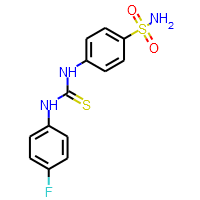
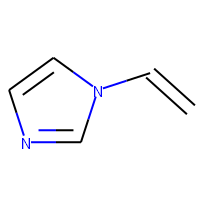
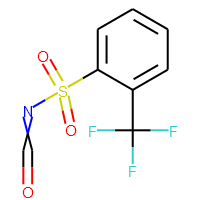
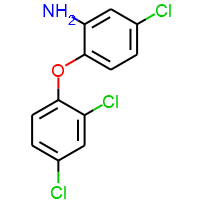
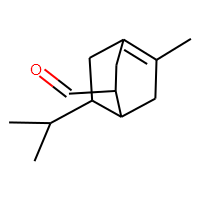
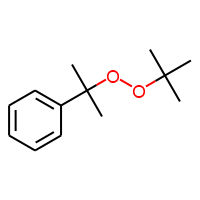
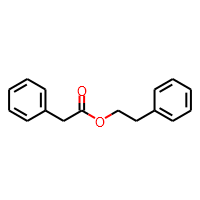
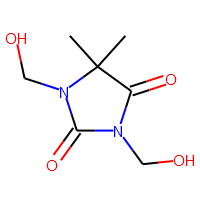
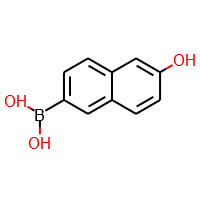
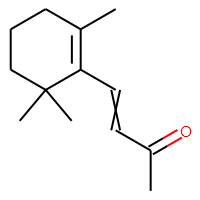
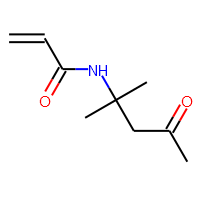
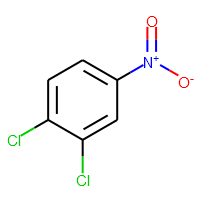
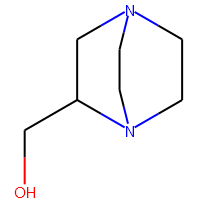
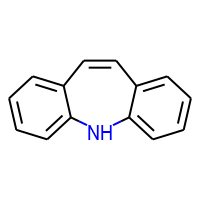
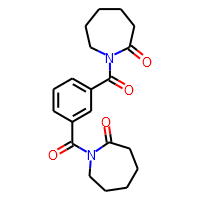
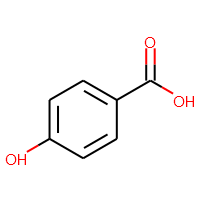
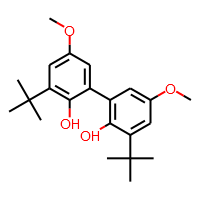
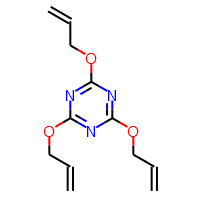
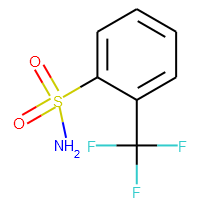
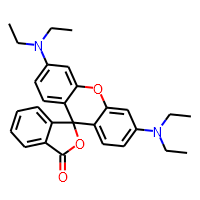
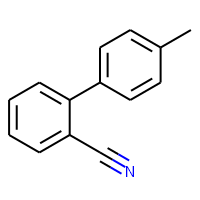
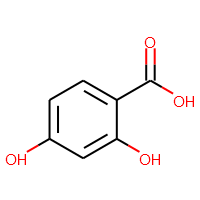
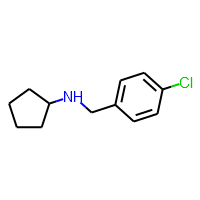
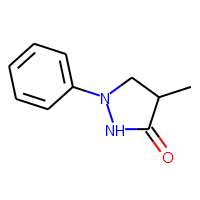
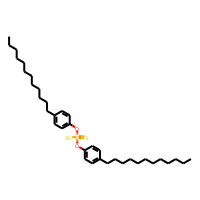
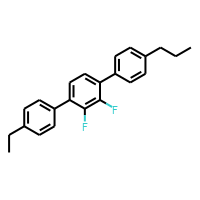
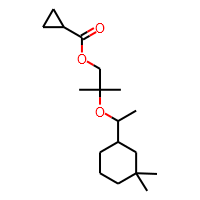
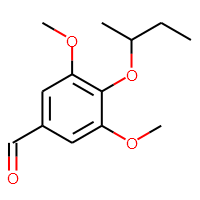
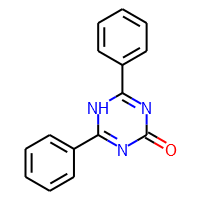
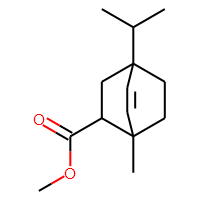
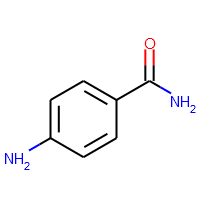
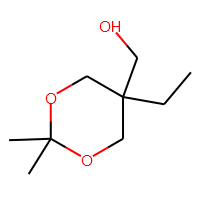
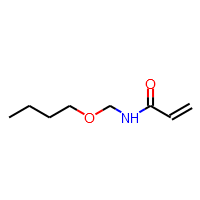
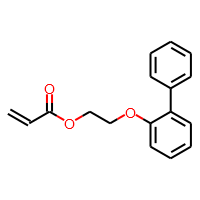
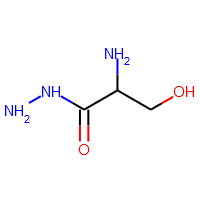
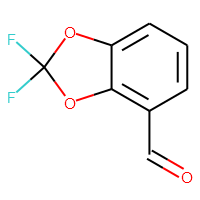
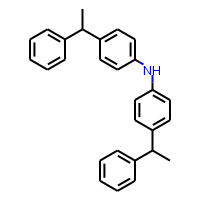
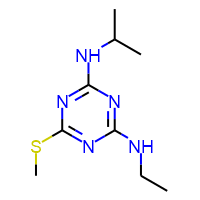
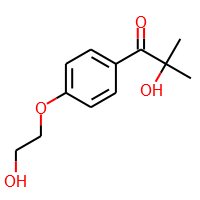
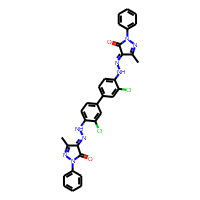
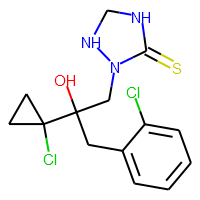
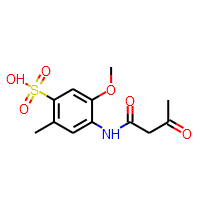
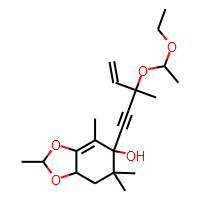
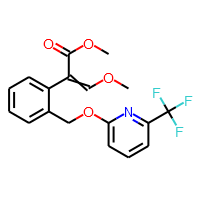
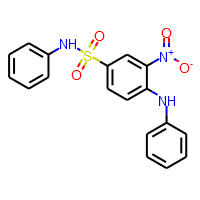
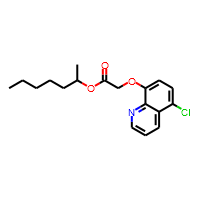
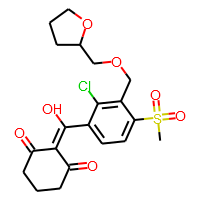
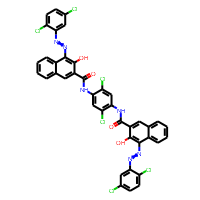
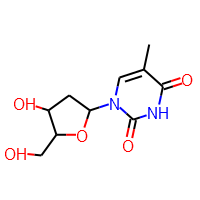
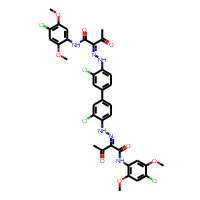
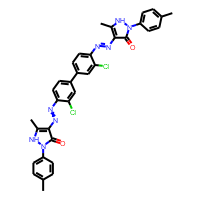
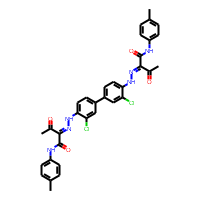
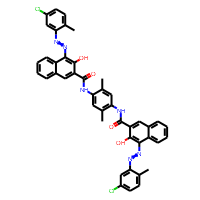
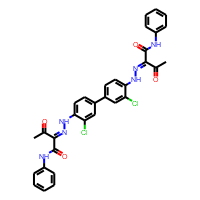
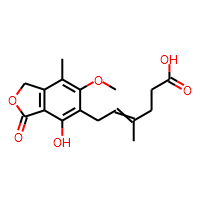
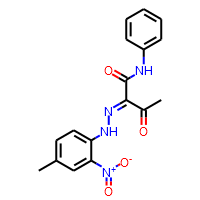
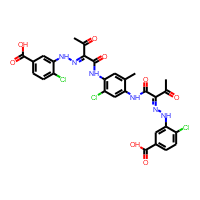
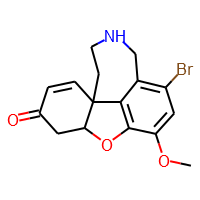
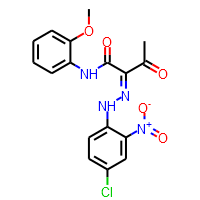
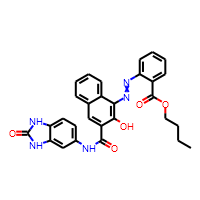
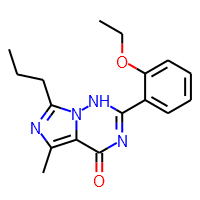
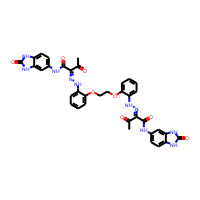
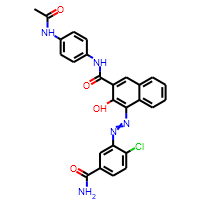
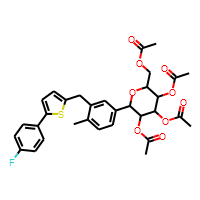
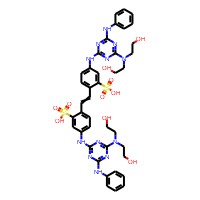
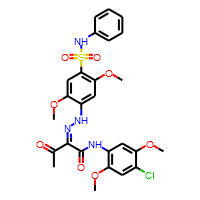
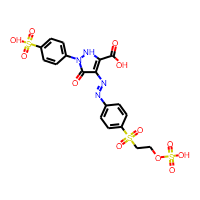
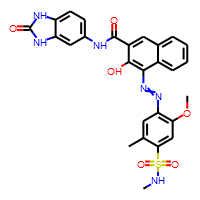
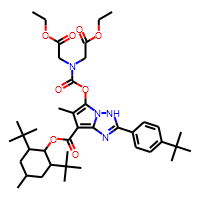
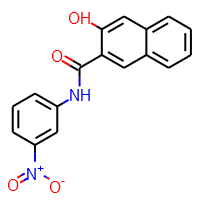
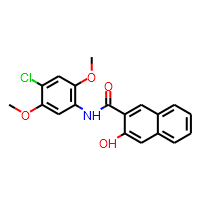
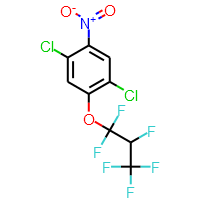
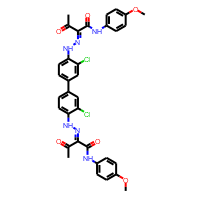
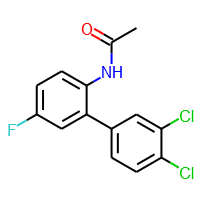
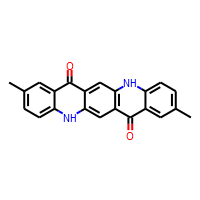
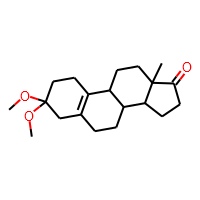
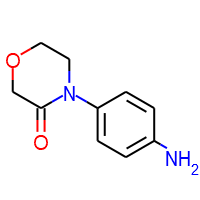
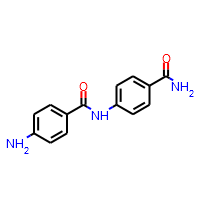
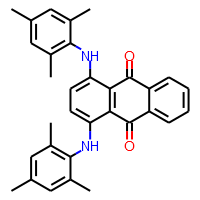
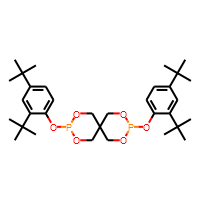
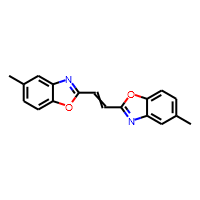
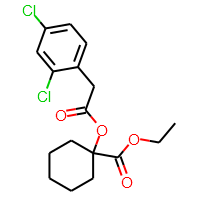
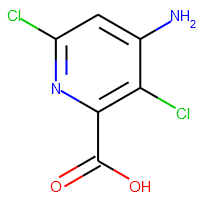
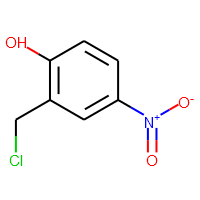
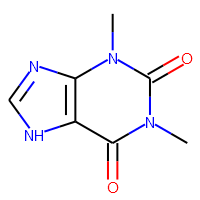
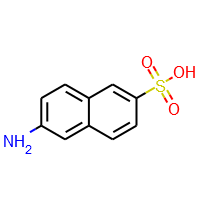
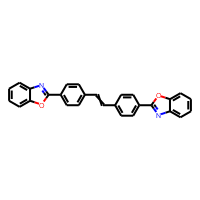
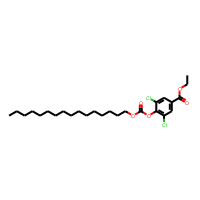
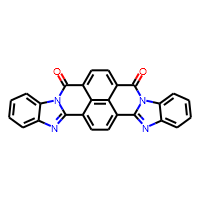
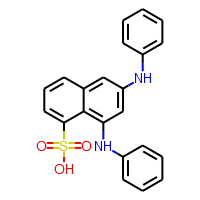
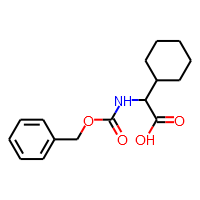
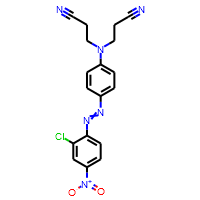
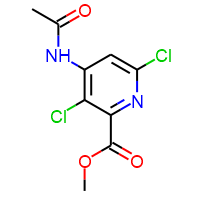
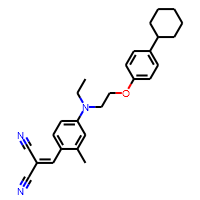
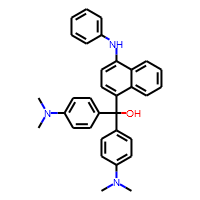
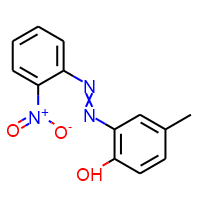
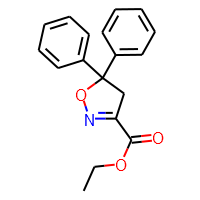
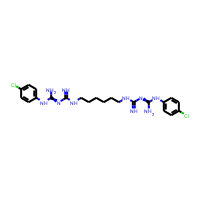
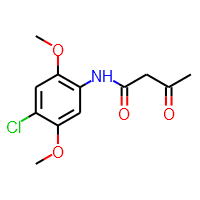
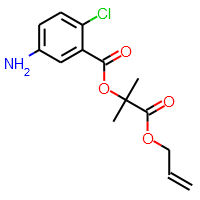
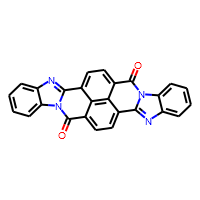
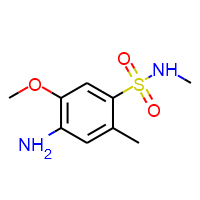
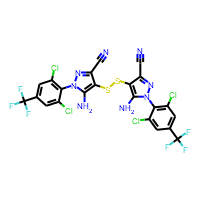
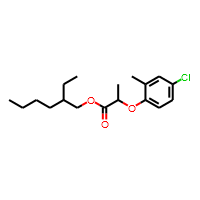
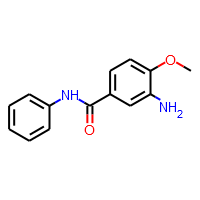
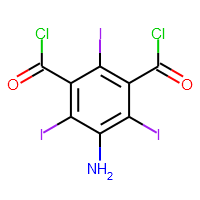
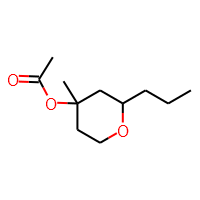
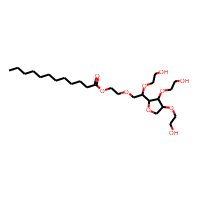
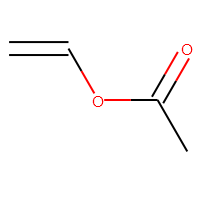
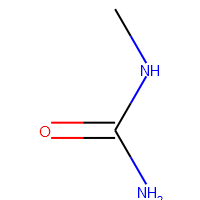
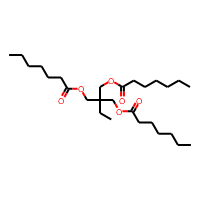
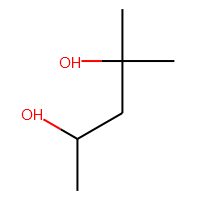
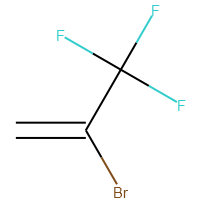
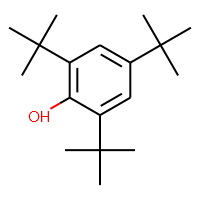
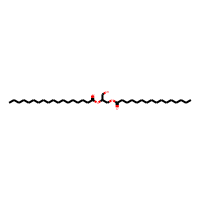
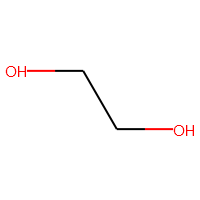
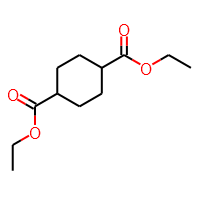
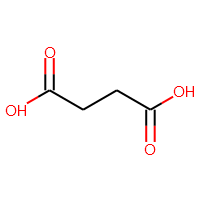
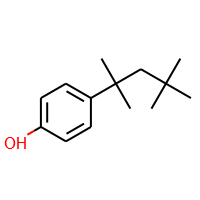
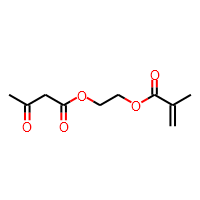
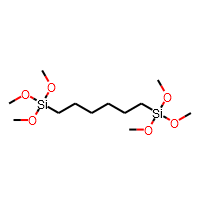
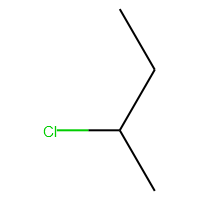
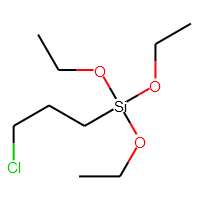
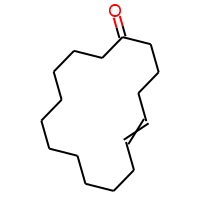
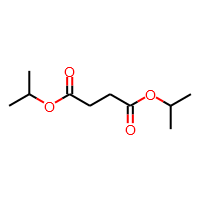
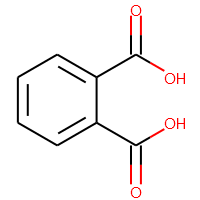
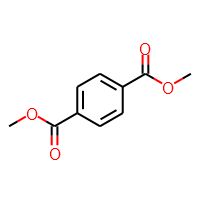
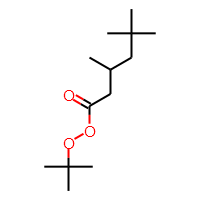
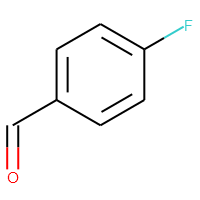
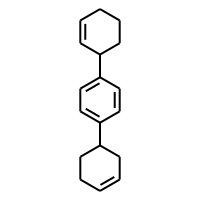
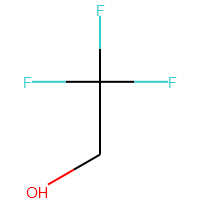
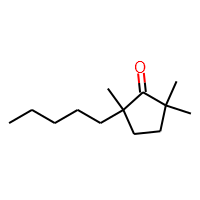
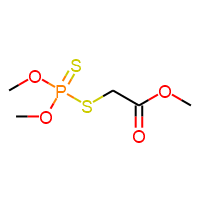
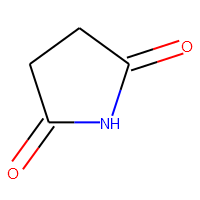
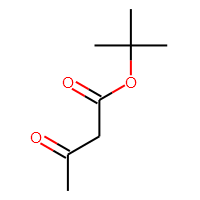
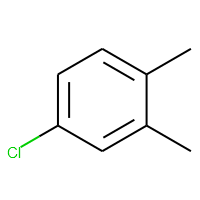
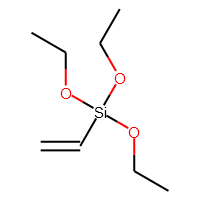
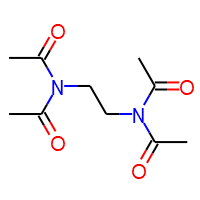
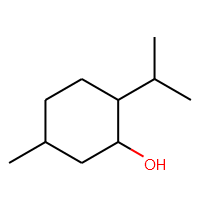
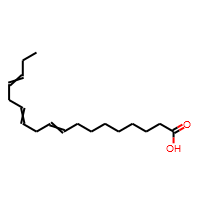
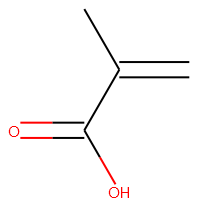
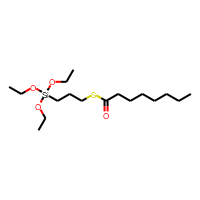
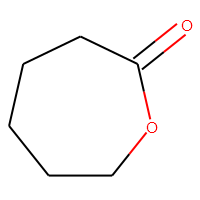
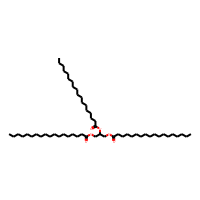
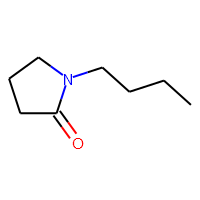
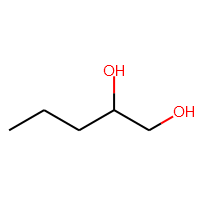
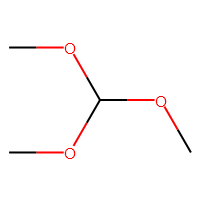
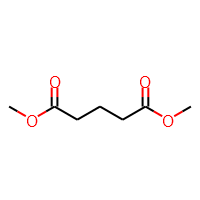
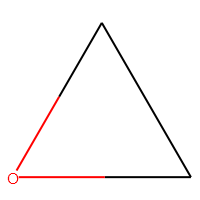
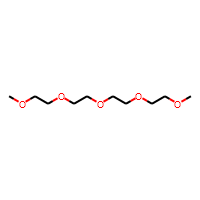
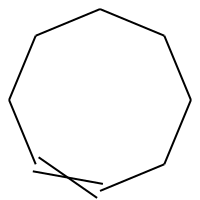
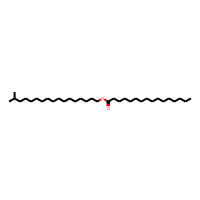
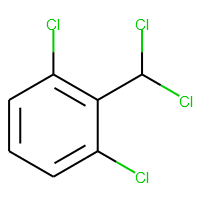
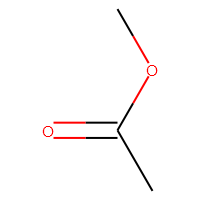
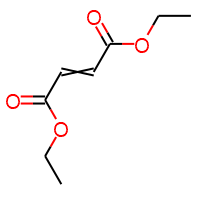
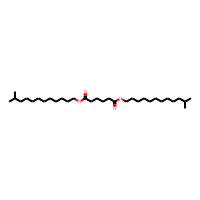
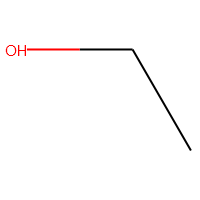
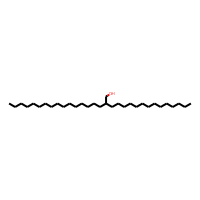
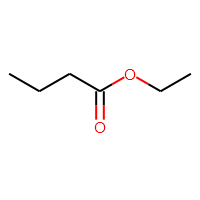
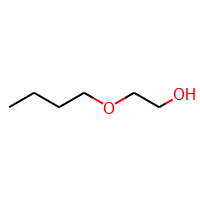
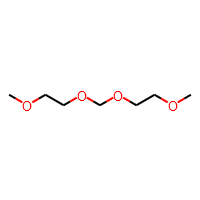
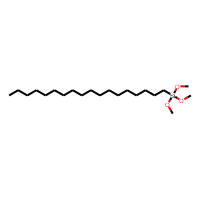
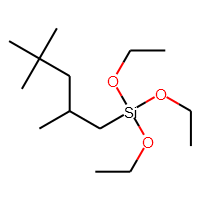
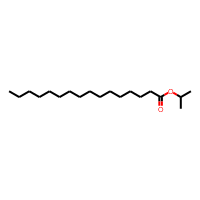
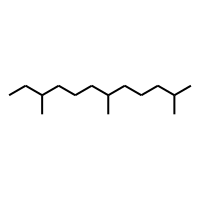
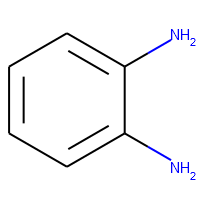
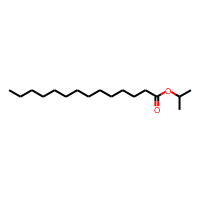
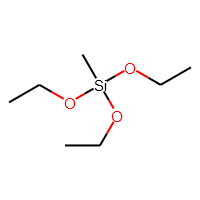
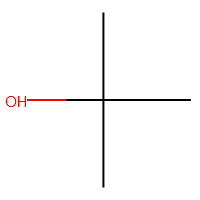
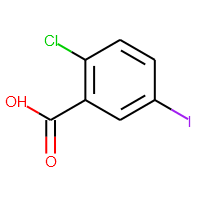
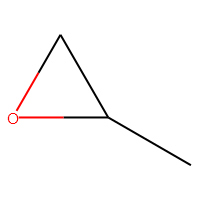
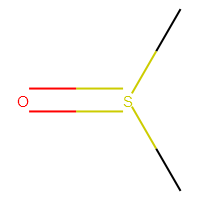
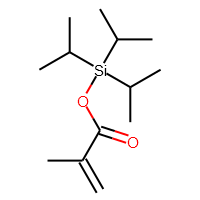
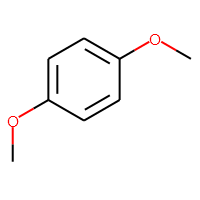
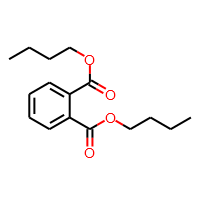
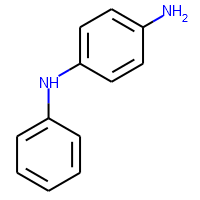
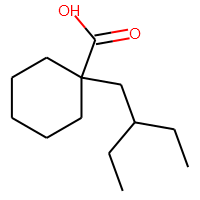
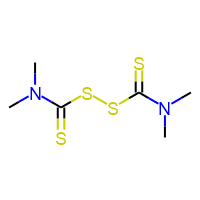
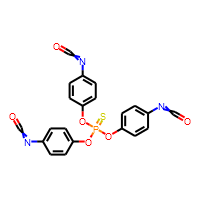
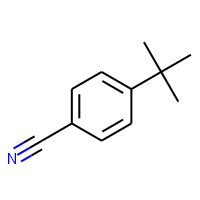
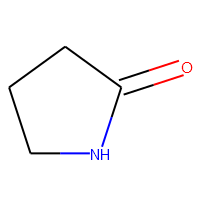
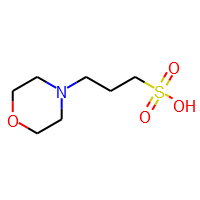
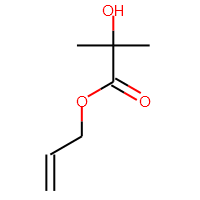
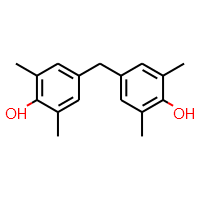
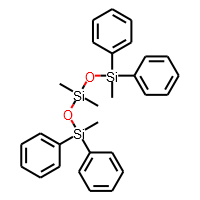
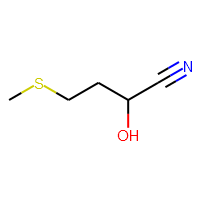
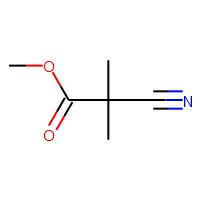
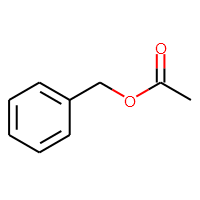
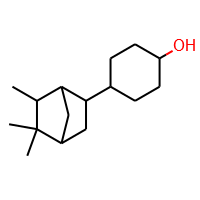
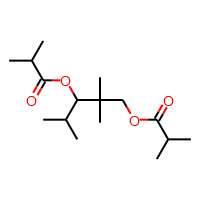
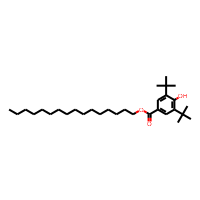
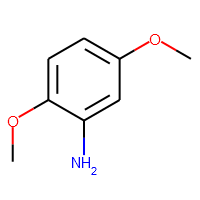
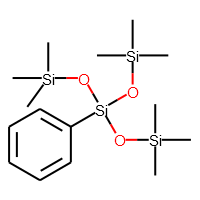
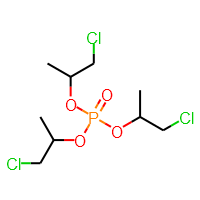
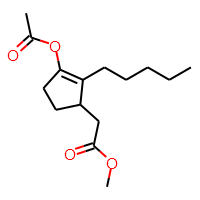
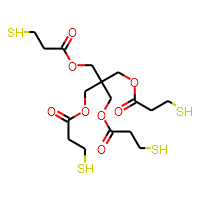
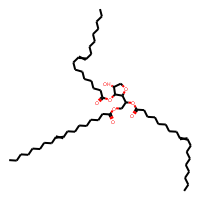
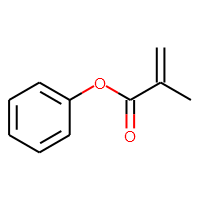
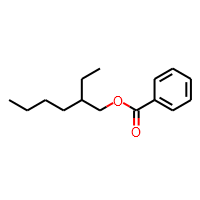
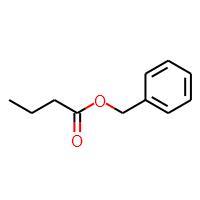
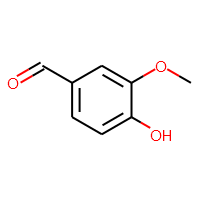
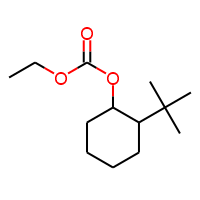
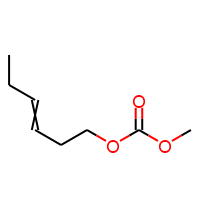
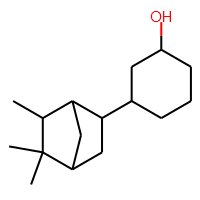
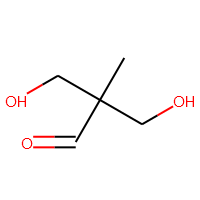
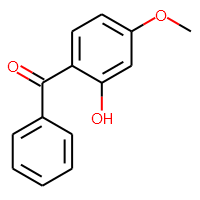
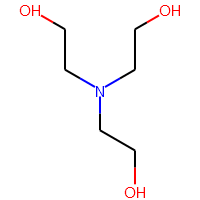
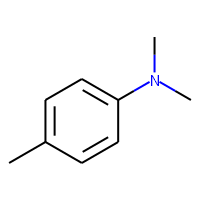
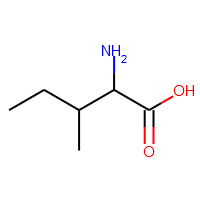
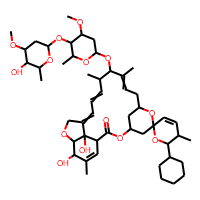
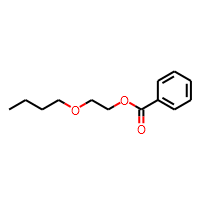
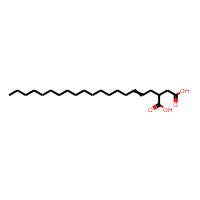
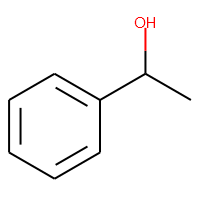
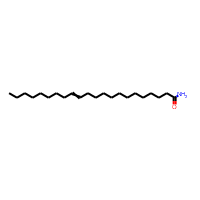
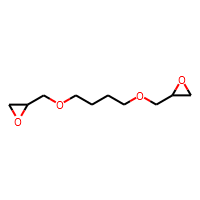
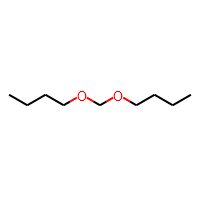
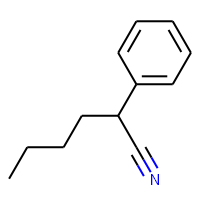
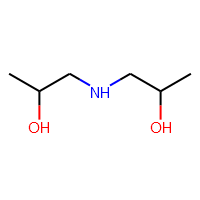
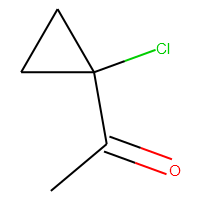
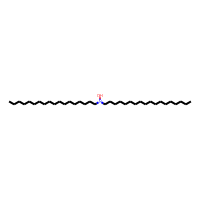
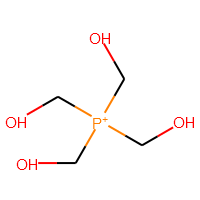
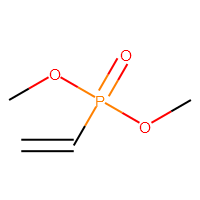
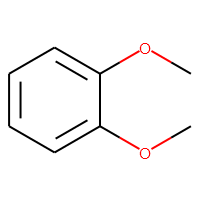
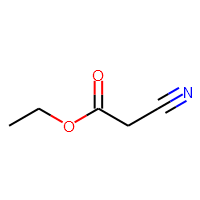
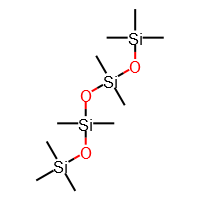
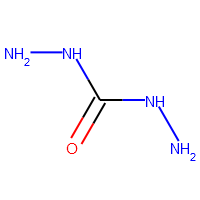
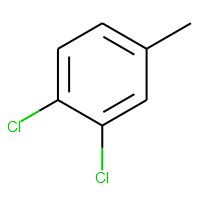
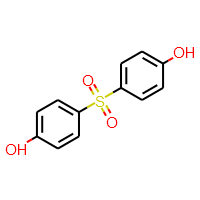
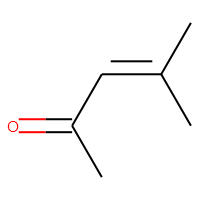
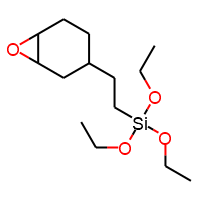
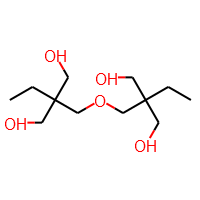
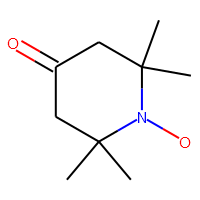
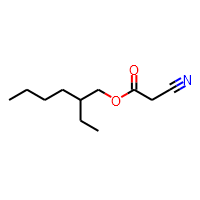
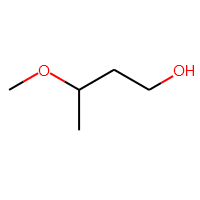
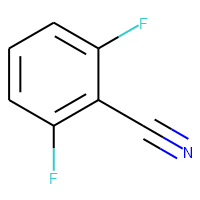
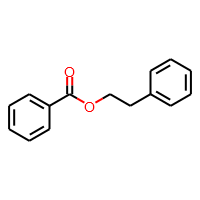
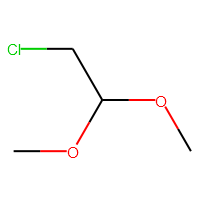
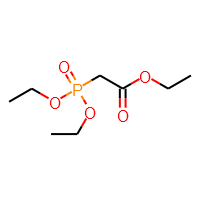
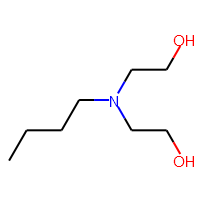
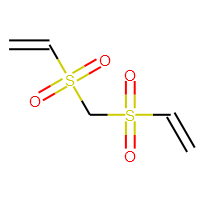
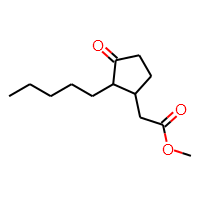
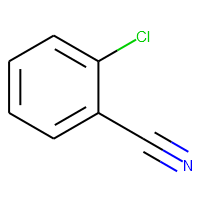
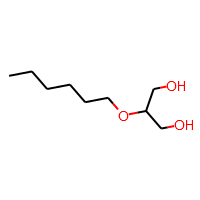
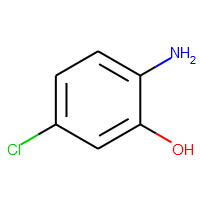
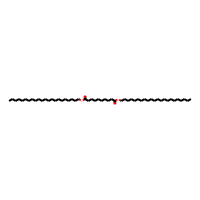
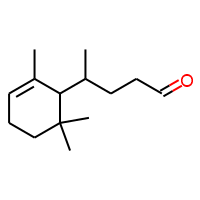
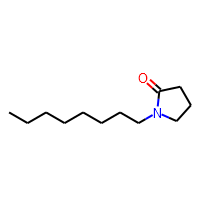
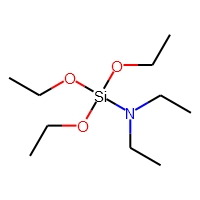
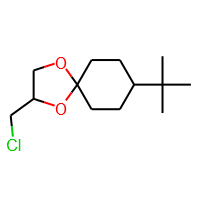
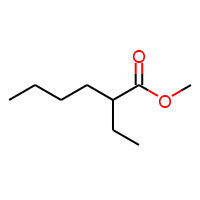
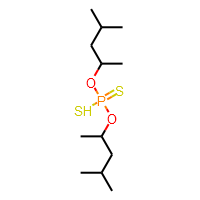
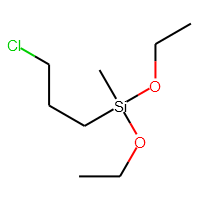
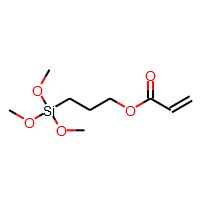
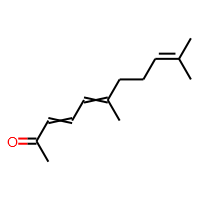
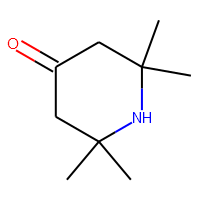
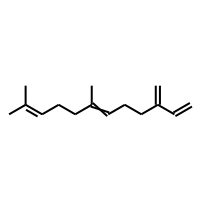
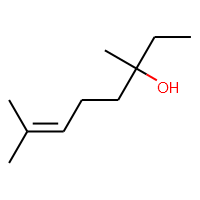
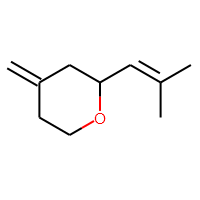
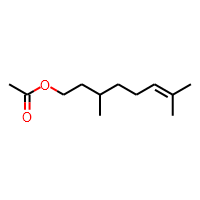
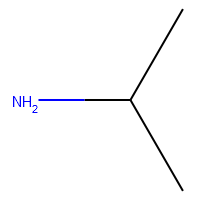
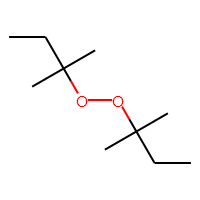
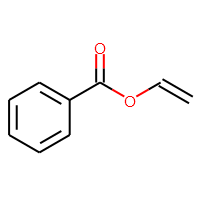
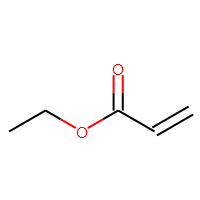
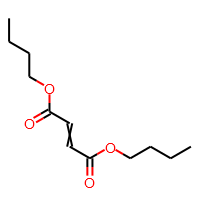
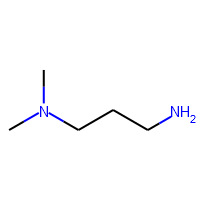
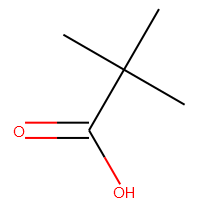
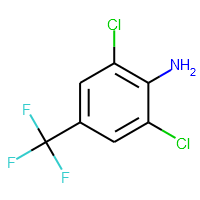
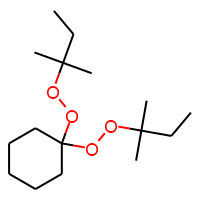
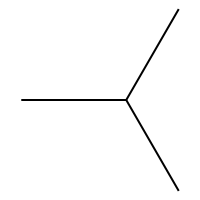

In [ ]:
moldf= moldf.sort_values(['Outcome'], ascending=True)
moldf['RowID'] = moldf.index
moldf.head(300)

## 4. Definir a coluna a ser usada como variável dependente

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


outcomes=(np.unique(moldf['Outcome']))
le.fit(list(set(outcomes)))
y = le.transform( moldf['Outcome'] )



print ("Classes                          : ",(outcomes))
print ("Number of cpds in each class     : ",np.unique([len(y[y==smi]) for smi in y]))
print ("Total number of cpds             : ",len(y))

S = moldf['Outcome']
info = {}
for i,cls in enumerate(S.unique()):
    info.update({cls:i})
    S = S.replace(cls,i)

Classes                          :  [0 1]
Number of cpds in each class     :  [276 277]
Total number of cpds             :  553


{0: 0, 1: 1}

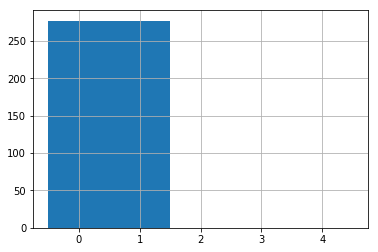

In [ ]:
ax = S.hist(bins=np.arange(-0.5,5))
ax.set_xticks(range(0,5))
info

## 5. Descritor e Modelagem

ID                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
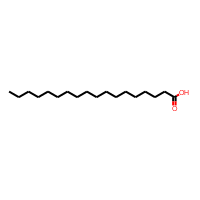
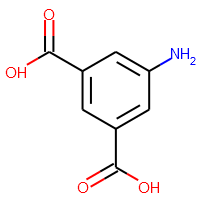
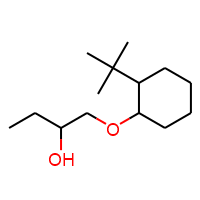
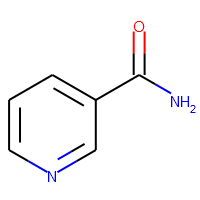
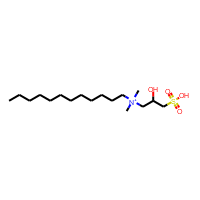

In [ ]:
from rdkit.Chem import MACCSkeys
calcfp = lambda mol: MACCSkeys.GenMACCSKeys(mol)
moldf['Descriptors'] = moldf.Mol.apply(calcfp)

y= np.int32((S))
x = np.array(list(moldf['Descriptors']))

moldf.head()

In [ ]:
############################################## Random Forest ##################################################
paramgrid = {"max_features": [x.shape[1] , x.shape[1] // 2,  x.shape[1] // 4,  x.shape[1] // 12,  x.shape[1] // 10, x.shape[1] // 7, x.shape[1] // 5, x.shape[1] // 3 ],
             "n_estimators": [ 10, 100, 300, 500], }


from sklearn.model_selection import RepeatedKFold
from evolutionary_search import EvolutionaryAlgorithmSearchCV


ncores=1
verbose=1
seed = 24

np.random.seed(seed)

# Kappa Scorer 
kappa_scorer = metrics.make_scorer(quadratic_weighted_kappa, greater_is_better = True)



model = EvolutionaryAlgorithmSearchCV(estimator=RF(class_weight=None),
                                   params=paramgrid,
                                   scoring=kappa_scorer,
                                   cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=seed),
                                   verbose=1,
                                   population_size=50,
                                   gene_mutation_prob=0.10,
                                   gene_crossover_prob=0.5,
                                   tournament_size=3,
                                   generations_number=5,
                                   iid=True,
                                   refit=True,
                                   n_jobs=ncores)

model.fit(x, y)

# Get best model
best_model = model.best_estimator_

# Fit model with best parameters optimized for quadratic_weighted_kappa
best_model.fit(x,y)




Types [1, 1] and maxint [7, 3] detected
--- Evolve in 32 possible combinations ---


## 6. Avaliação Externa e Parametros Estatísticos

### 6.1 5-Fold Externo com todos os dados

In [ ]:
 ypreds_folds_total_final,index_test_folds_final, training_labels_AD_final_conc,training_labels_pred_AD_final_conc, y_obs_folds, test_index_ad_final_conc, Dc,index_train_folds, index_test_folds, ypreds_folds, yproba_folds, k  = AD_scikitlearn(x,y,seed=seed, model_name= best_model)
run_statistics(y_obs_folds, ypreds_folds_total_final, label="RF external 5-fold CV", coverage=100)

### 6.2 5-Fold Externo somente com os dados no AD

In [ ]:
coverage=(((len(training_labels_AD_final_conc))*100)/(float(len(index_test_folds_final)*100))*100)
run_statistics(training_labels_AD_final_conc, training_labels_pred_AD_final_conc, label="RF external 5-fold CV", coverage=coverage)

# 7. Preparar os dados para salvar

### Atributos:

* molecules:
     `pandas.DataFrame()` com os descritores moleculares para o dataset* (usado na `similarity_table()`)
* descriptor:
    *`dict()` com informações do descritor utilizado (usado na `similarity_table()`)
        * function: função de calcular o descritor
        * info: `dict()` com os argumentos de entrada da função
        * name: nome do descritor
* models:
    * `list()` de `dict()` com os dados dos modelos:
        * model: modelo de predição do `scikit-learn`
        * name: nome do modelo
        * longname: descrição curta do modelo
        * descriptor: `dict()` com informações do descritor utilizado
            * function: função de calcular o descritor
            * info: `dict()` com os argumentos de entrada da função
            * name: nome do descritor
         fpDF: `pandas.DataFrame()` com os descritores moleculares para o dataset*
        * dataset: `pandas.DataFrame()` com as informações moleculares de validação do modelo
         applM: distribuição de similaridade do k*-vizinho mais próximo calculada para toda dataset
        * k: ordinal do vizinho mais próximo calculado para o dataset
        * dda: limite estabelecido para que a molécula esteja no domínio de aplicabilidade do modelo

### Métodos:

* `model_table()`:
    * Gera a tabela (`pandas.DataFrame()`) de resultados dos modelos
* `AD_table()`:
    * Gera a tabela (`pandas.DataFrame()`) de domínio de aplicabilidade dos modelos
* `similarity_table`:
    * Gera a tabela (`pandas.DataFrame()`) dos mapas de similaridade das `n` moléculas mais próximas.
    * Gera dados de similaridade que serão usados pela função `similarity_statistics()`
    
##  7.1 Gerando a tabela de dados com todas predições para cada fold

In [ ]:
#Get all external Folds and save in Excel format

all_ext_Folds = pd.DataFrame()
for foldnum in range(1,5+1):
    for rep in range(1,5+1):
        final_frame = (len(moldf)-1) 
        fold_N= index_test_folds[foldnum-1]
        pred_N= ypreds_folds[foldnum-1]
        proba_N = yproba_folds[foldnum-1]
        
        tab = moldf.iloc[fold_N,:]
        tab['Prediction'] = pred_N
        tab['Confiability'] = proba_N
        tab['Fold'] = 'Fold {:d} extenal Repetition {:d}'.format(foldnum,rep)

        all_ext_Folds = all_ext_Folds.append(tab).reset_index(drop=True)


cols = ['ROMol','SMILES','Outcome','Prediction','Fold']

### melhorar ##
dX = dict()
[dX.update({i:[val]}) for i,val in enumerate(x)]
dfX = pd.DataFrame.from_dict(dX).T
dfX.columns=['FingerPrint']
dfX['SMILES'] = moldf['SMILES']

#########################

Dict_AD = {}
Dict_AD["FingerPrint"] = dfX
Dict_AD["Folds"] = all_ext_Folds
Dict_AD["k"] = k
Dict_AD["AD.distance.limit"] = Dc.mean()
Dict_AD["distance_AD"] = np.asarray(getNeighborsDitance(x, x, k))
Folds_true= Dict_AD["Folds"]
Folds_true = Folds_true.drop('Descriptors', 1)



###  7.1.1 Mostrando a tabela de dados com todas predições para cada fold (last one)

In [ ]:
Folds_true.head()

In [ ]:

newKeys = {'FingerPrint':'fpDF', 'Folds':'molDF',
        'k':'k', 'AD.distance.limit':'dda',
        'distance_AD':'applM'}

    # Renomeando as chaves
Dict_AD = {newKeys[key]:value for key,value in Dict_AD.items()}
    # Filtrando a tabela
Dict_AD['molDF'] = filter_table(Dict_AD['molDF'])

Dict_AD['molDF']['mol'] = list(map(Chem.MolFromSmiles,Dict_AD['molDF'].index))


##  7.2 Definir as categorias (resultado médias dos folds por molécula)

In [ ]:
Dict_AD['molDF']['Prediction']=np.where(Dict_AD['molDF']['Prediction']>=0.6, 'Irritant', 'Non-Irritant')
Dict_AD['molDF'].head()

##  7.3 Mostras a distribuição da similaridade dos dados  AD

In [ ]:
import matplotlib.pyplot as plt
plt.hist(Dict_AD['applM'])

#  8. Salvando modelo e os dados adicionais

In [ ]:
from sklearn.externals import joblib
joblib.dump(best_model, 'model/Modelo_skin_irrit_maccs.pkl',compress=9)

In [ ]:
import bz2
import pickle
import _pickle as cPickle
with bz2.BZ2File('model/Dados_adicionais_skin_irrit_maccs.pbz2', 'w') as f:
    pickle.dump(Dict_AD, f)
    